# Part 4 Data Modelling with Holt-Winter

After applying ARIMA and FBProphet models, it's time to see how Holt-Winter performs with our data. We will start with <b>daily dataset</b> first.

In [1]:
# import necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error,  mean_absolute_error
import os

Let's first start with PM2.5 data.

In [2]:
# load datasets
train_PM25 = pd.read_csv('dataset/daily/train/train_PM2.5.csv', parse_dates = [0], index_col = [0])
test_PM25 = pd.read_csv('dataset/daily/test/test_PM2.5.csv', parse_dates = [0], index_col = [0])

In [3]:
# print first few rows
train_PM25.head()

,PM2.5
Date-Time,
2013-03-01,6.458333
2013-03-02,28.750000
2013-03-03,104.750000
2013-03-04,22.875000
2013-03-05,131.833333


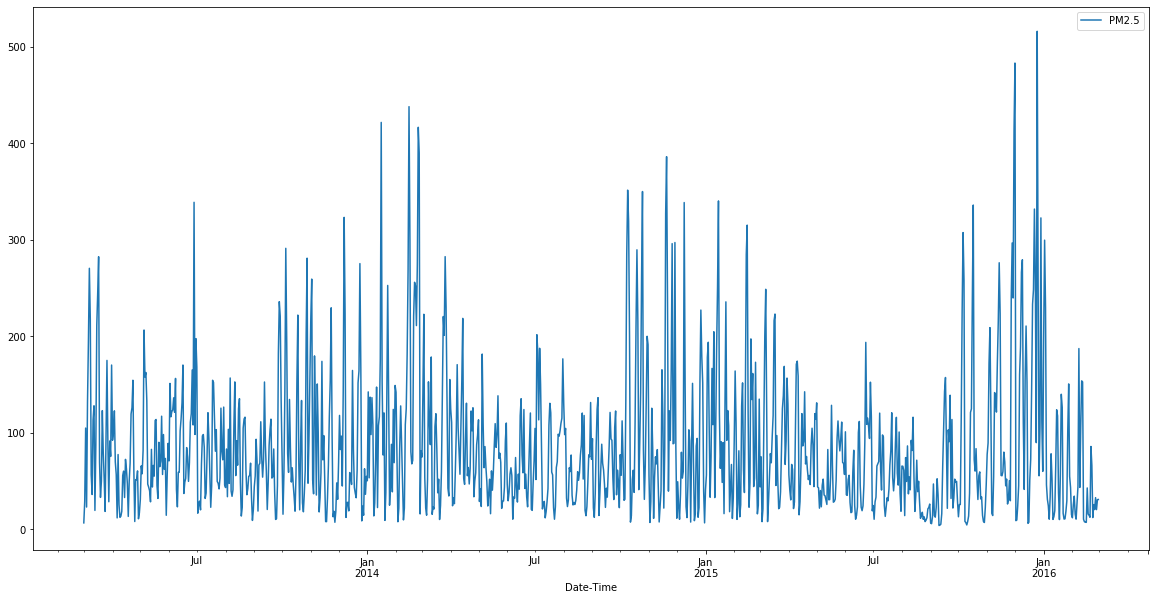

In [4]:
# lets plot our training data
train_PM25.plot(figsize = (20,10))

##### Holt-Winter on PM2.5 daily data.

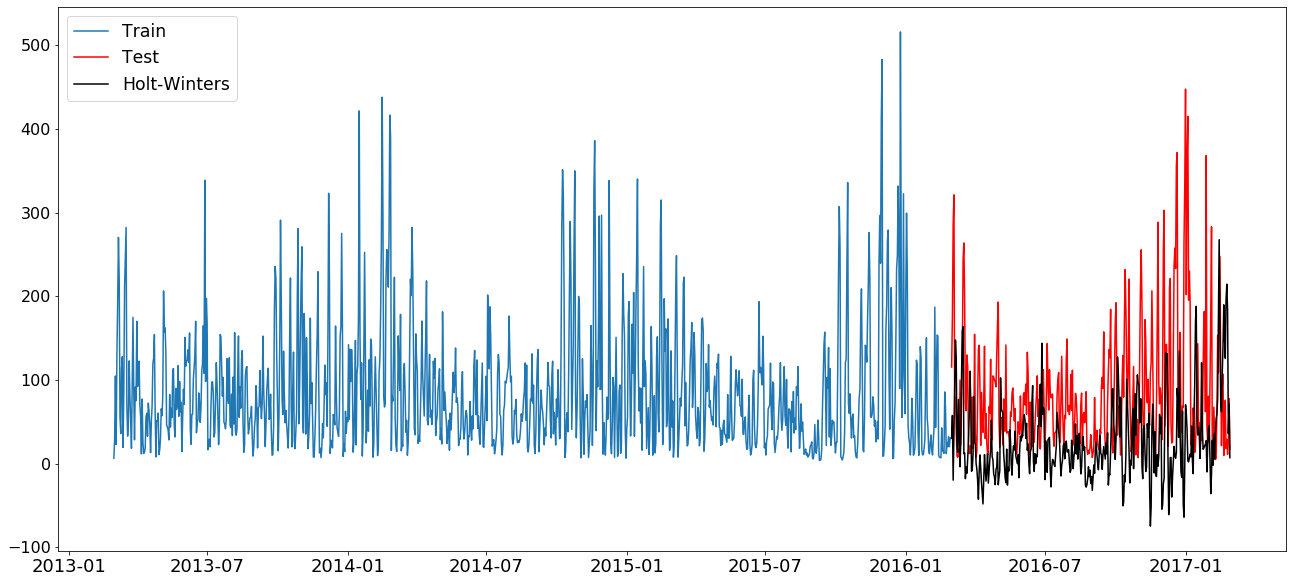

In [5]:
# fit the basic Holt-Winter model
# Since we have daily data with seasonal like fluctuations we will take seasonal_periods as 365
# Since the fluctuations are not high so we will take seasonal component as 'add'
model = ExponentialSmoothing(train_PM25, seasonal='add', seasonal_periods=365).fit()
# predict with the model
holt_pred = model.predict(start=test_PM25.index[0], end=test_PM25.index[-1])
# plot the results
plt.figure(figsize=(22, 10))
plt.plot(train_PM25.index, train_PM25, label='Train')
plt.plot(test_PM25.index, test_PM25, label='Test', color='r')
plt.plot(holt_pred.index, holt_pred, label='Holt-Winters', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

Since the fit was quite descent compared to rest of the statistic models, let's evaluate to see the results.

In [6]:
# model evaluation
actual = test_PM25
pred = holt_pred

# calcuate mean square error
mse = mean_squared_error(actual, pred)
# calculate mean absolute error
mae = mean_absolute_error(actual, pred)
# print results
print('The Mean Squared Error of PM2.5 forecasts is {}'.format(round(mse, 2)))
print('The Mean Absolute Error of PM2.5 forecasts is {}'.format(round(mae, 2)))
print('The Root Mean Squared Error of PM2.5 forecasts is {}'.format(np.sqrt(mse)))

The Mean Squared Error of PM2.5 forecasts is 11389.6
The Mean Absolute Error of PM2.5 forecasts is 76.12
The Root Mean Squared Error of PM2.5 forecasts is 106.72206272276625


The Results indicate that the fit was not proper, but let's try to compare it's performance with other pollutants data.
<br>
#### Holt-Winter on daily data of Pollutants

In [7]:
# load all daily datasets
train_PM10 = pd.read_csv('dataset/daily/train/train_PM10.csv', parse_dates = [0], index_col = [0])
test_PM10 = pd.read_csv('dataset/daily/test/test_PM10.csv', parse_dates = [0], index_col = [0])
train_SO2 = pd.read_csv('dataset/daily/train/train_SO2.csv', parse_dates = [0], index_col = [0])
test_SO2 = pd.read_csv('dataset/daily/test/test_SO2.csv', parse_dates = [0], index_col = [0])
train_NO2 = pd.read_csv('dataset/daily/train/train_NO2.csv', parse_dates = [0], index_col = [0])
test_NO2 = pd.read_csv('dataset/daily/test/test_NO2.csv', parse_dates = [0], index_col = [0])
train_CO = pd.read_csv('dataset/daily/train/train_CO.csv', parse_dates = [0], index_col = [0])
test_CO = pd.read_csv('dataset/daily/test/test_CO.csv', parse_dates = [0], index_col = [0])
train_O3 = pd.read_csv('dataset/daily/train/train_O3.csv', parse_dates = [0], index_col = [0])
test_O3 = pd.read_csv('dataset/daily/test/test_O3.csv', parse_dates = [0], index_col = [0])


Prediction results for  PM10


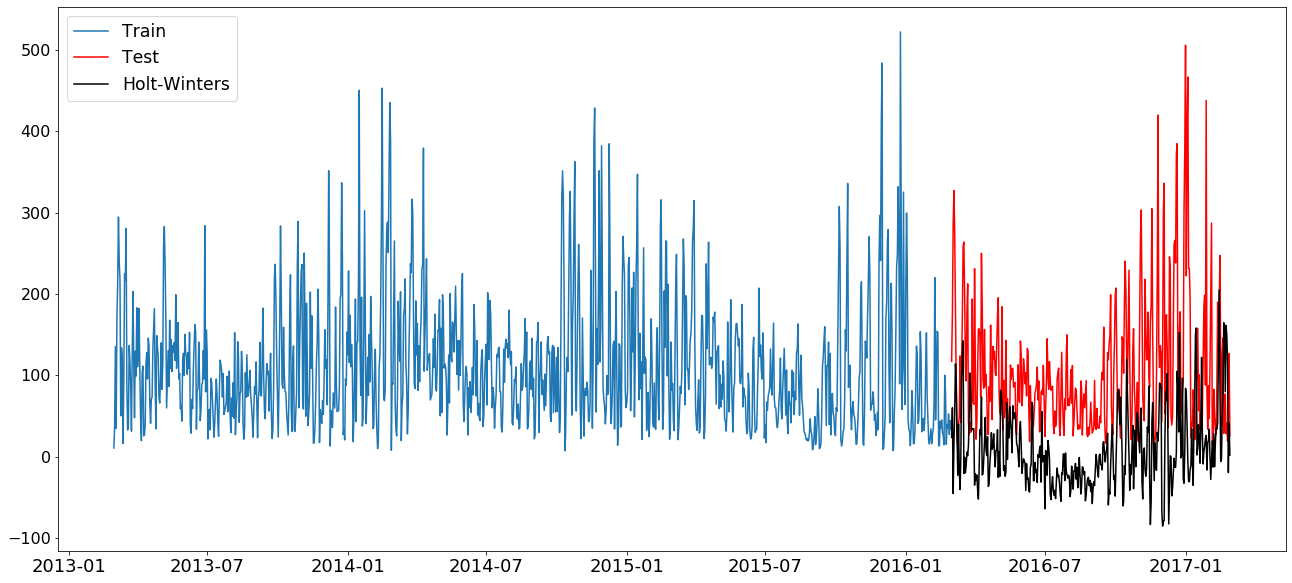

The Mean Squared Error of PM10 forecasts is 17708.68
The Mean Absolute Error of PM10 forecasts is 103.79
The Root Mean Squared Error of PM10 forecasts is 133.07396452540354

Prediction results for  SO2


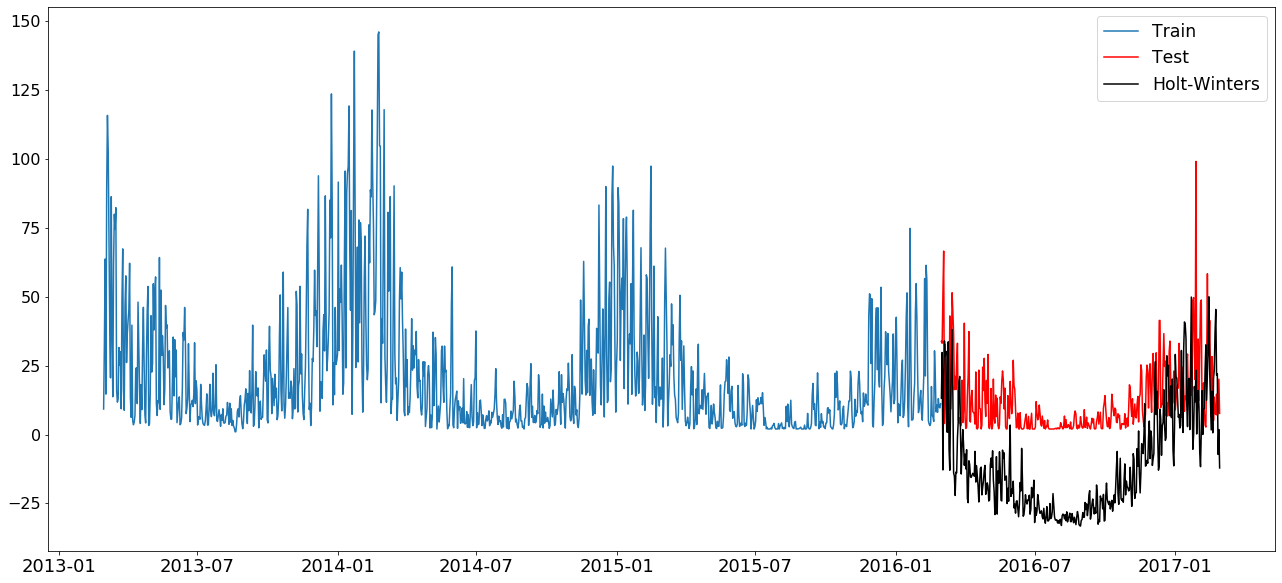

The Mean Squared Error of SO2 forecasts is 815.91
The Mean Absolute Error of SO2 forecasts is 25.83
The Root Mean Squared Error of SO2 forecasts is 28.564105311762273

Prediction results for  NO2


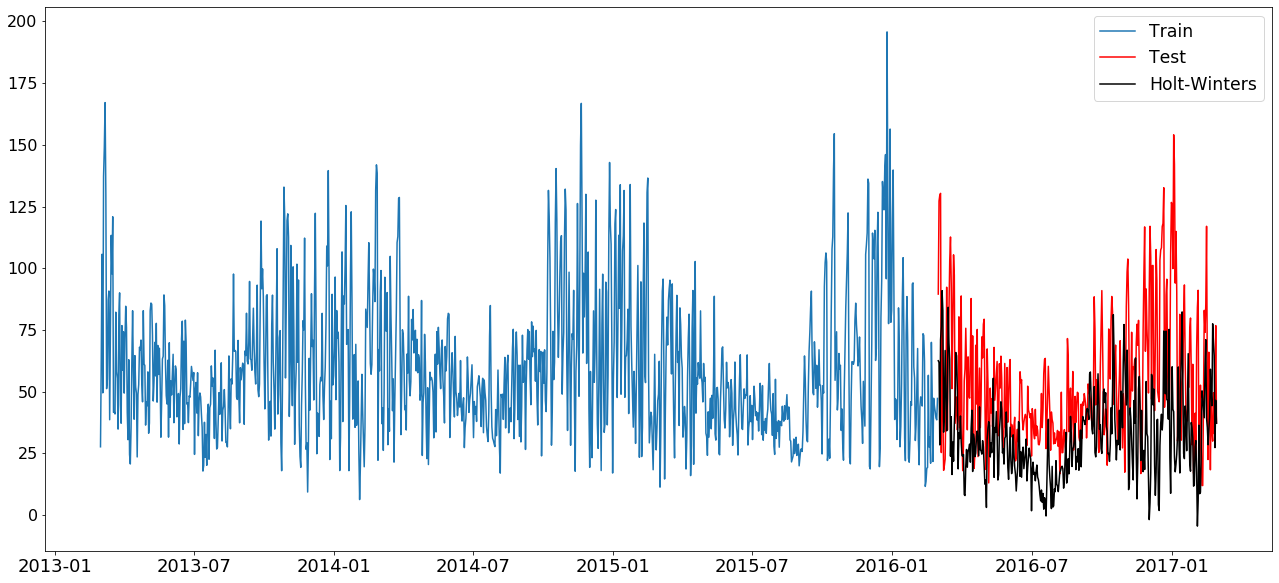

The Mean Squared Error of NO2 forecasts is 1325.19
The Mean Absolute Error of NO2 forecasts is 28.08
The Root Mean Squared Error of NO2 forecasts is 36.40319561345169

Prediction results for  CO


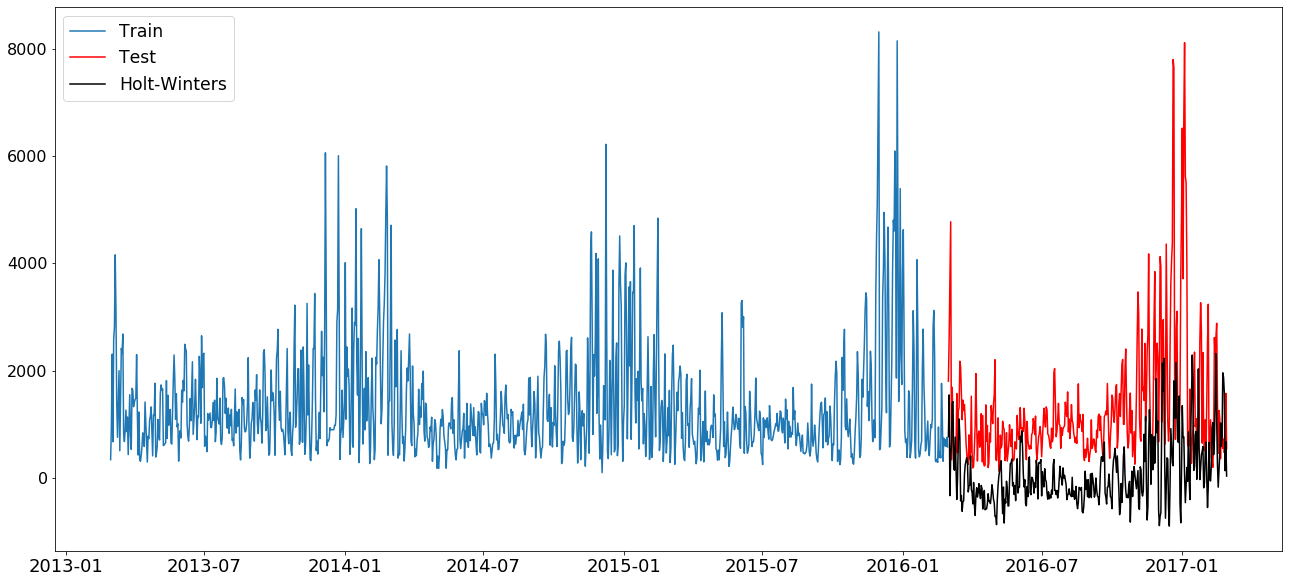

The Mean Squared Error of CO forecasts is 2938923.13
The Mean Absolute Error of CO forecasts is 1281.83
The Root Mean Squared Error of CO forecasts is 1714.3287685176374

Prediction results for  O3


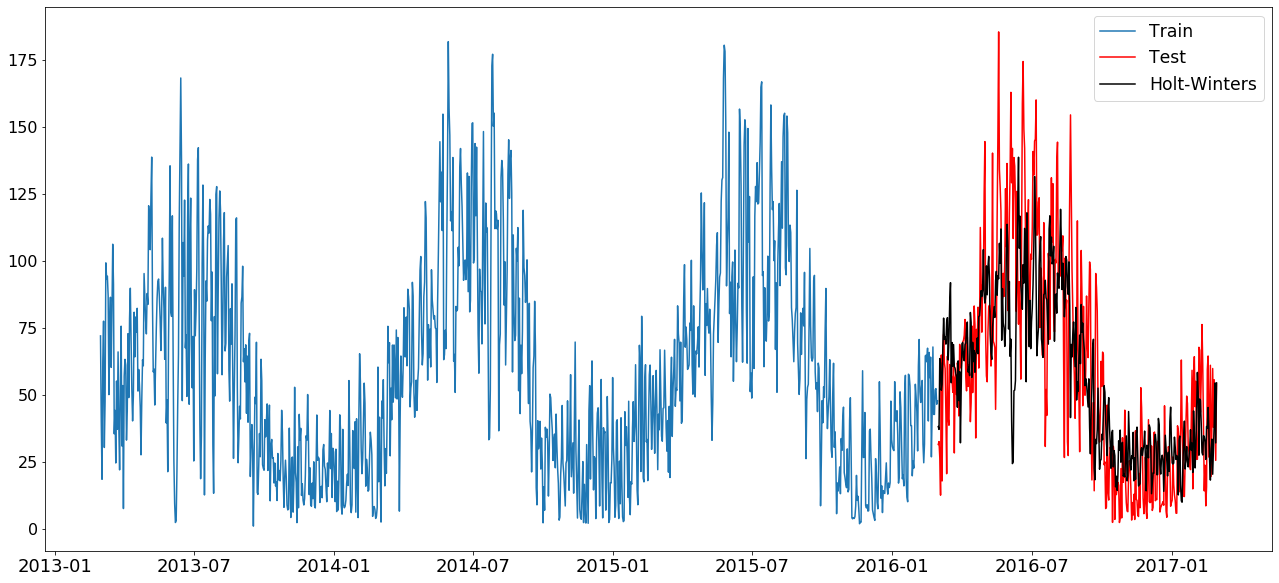

The Mean Squared Error of O3 forecasts is 861.43
The Mean Absolute Error of O3 forecasts is 22.19
The Root Mean Squared Error of O3 forecasts is 29.350157611192184


In [8]:
# create list of all train-sets
list_train = [train_PM10, train_SO2, train_NO2, train_CO, train_O3]
# create list of all test-sets
list_test = [test_PM10, test_SO2, test_NO2, test_CO, test_O3]
for i in range(len(list_train)):
    print('\nPrediction results for ',list_train[i].columns.values[0])
    # fit each train data to the model
    model = ExponentialSmoothing(list_train[i], seasonal='add', seasonal_periods=365).fit()
    # predict with the model
    holt_pred = model.predict(start=list_test[i].index[0], end=list_test[i].index[-1])
    # plot the results
    plt.figure(figsize=(22, 10))
    plt.plot(list_train[i].index, list_train[i], label='Train')
    plt.plot(list_test[i].index, list_test[i], label='Test', color='r')
    plt.plot(holt_pred.index, holt_pred, label='Holt-Winters', color='k')
    plt.legend(loc='best', fontsize='xx-large')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=16)
    plt.show()
    
    # model evaluation
    actual = list_test[i]
    pred = holt_pred

    # calcuate mean square error
    mse = mean_squared_error(actual, pred)
    # calculate mean absolute error
    mae = mean_absolute_error(actual, pred)
    # print results
    print('The Mean Squared Error of {} forecasts is {}'.format(list_train[i].columns.values[0], round(mse, 2)))
    print('The Mean Absolute Error of {} forecasts is {}'.format(list_train[i].columns.values[0], round(mae, 2)))
    print('The Root Mean Squared Error of {} forecasts is {}'.format(list_train[i].columns.values[0], np.sqrt(mse)))

As we can see, the model predictions were quite good for O3 and NO2. The model still did't perform well for rest of the pollutants.<br>


Let's try Holt-Winter on our monthly data now.
#### Holt-Winter on monthly data of all pollutants

In [9]:
# load all monthly datasets
train_PM25 = pd.read_csv('dataset/monthly/train/train_PM2.5.csv', parse_dates = [0], index_col = [0])
test_PM25 = pd.read_csv('dataset/monthly/test/test_PM2.5.csv', parse_dates = [0], index_col = [0])
train_PM10 = pd.read_csv('dataset/monthly/train/train_PM10.csv', parse_dates = [0], index_col = [0])
test_PM10 = pd.read_csv('dataset/monthly/test/test_PM10.csv', parse_dates = [0], index_col = [0])
train_SO2 = pd.read_csv('dataset/monthly/train/train_SO2.csv', parse_dates = [0], index_col = [0])
test_SO2 = pd.read_csv('dataset/monthly/test/test_SO2.csv', parse_dates = [0], index_col = [0])
train_NO2 = pd.read_csv('dataset/monthly/train/train_NO2.csv', parse_dates = [0], index_col = [0])
test_NO2 = pd.read_csv('dataset/monthly/test/test_NO2.csv', parse_dates = [0], index_col = [0])
train_CO = pd.read_csv('dataset/monthly/train/train_CO.csv', parse_dates = [0], index_col = [0])
test_CO = pd.read_csv('dataset/monthly/test/test_CO.csv', parse_dates = [0], index_col = [0])
train_O3 = pd.read_csv('dataset/monthly/train/train_O3.csv', parse_dates = [0], index_col = [0])
test_O3 = pd.read_csv('dataset/monthly/test/test_O3.csv', parse_dates = [0], index_col = [0])


Prediction results for  PM2.5


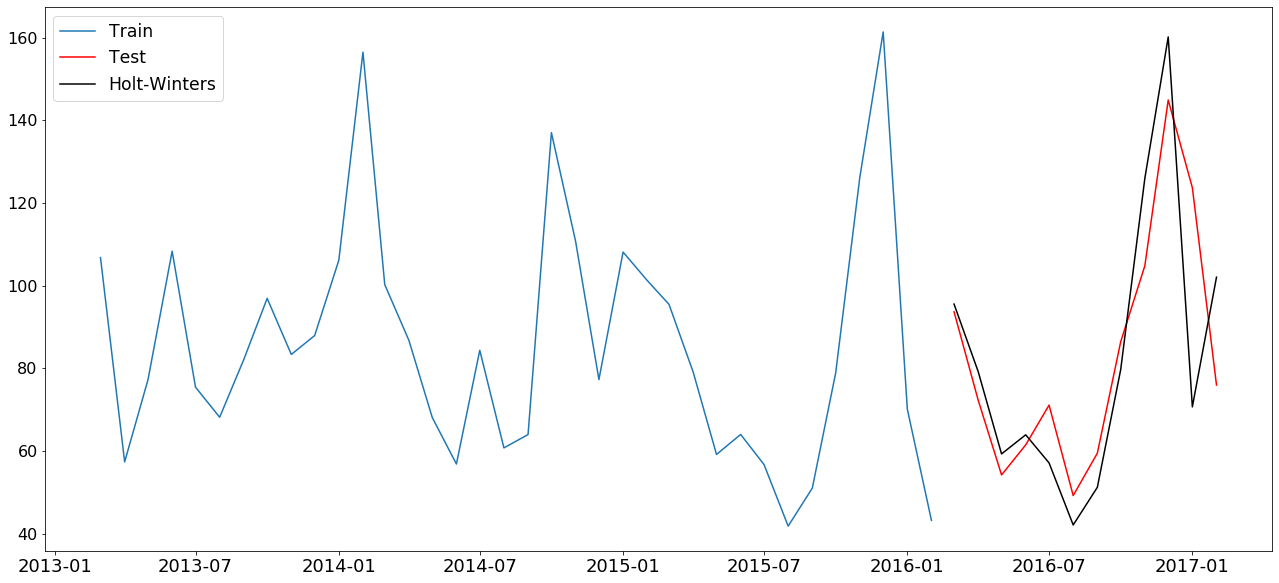

The Mean Squared Error of PM2.5 forecasts is 384.5693
The Mean Absolute Error of PM2.5 forecasts is 13.9932
The Root Mean Squared Error of PM2.5 forecasts is 19.6104

Results for PM2.5 successfully saved to result/holt_winter.csv

Prediction results for  PM10


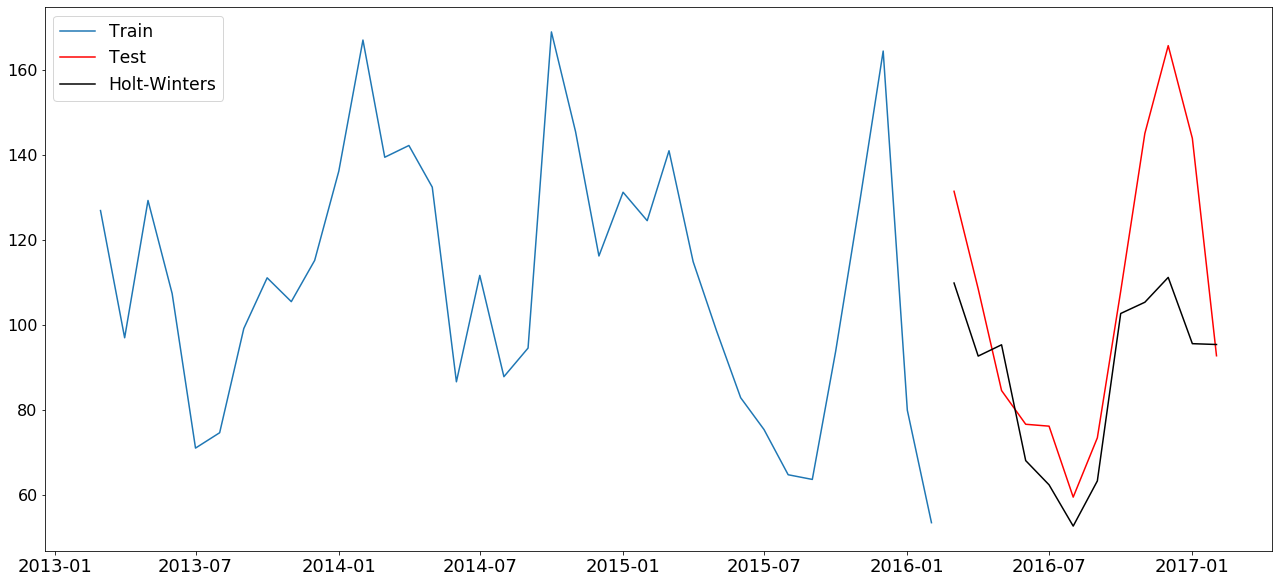

The Mean Squared Error of PM10 forecasts is 683.2383
The Mean Absolute Error of PM10 forecasts is 19.8702
The Root Mean Squared Error of PM10 forecasts is 26.1388

Results for PM10 successfully saved to result/holt_winter.csv

Prediction results for  SO2


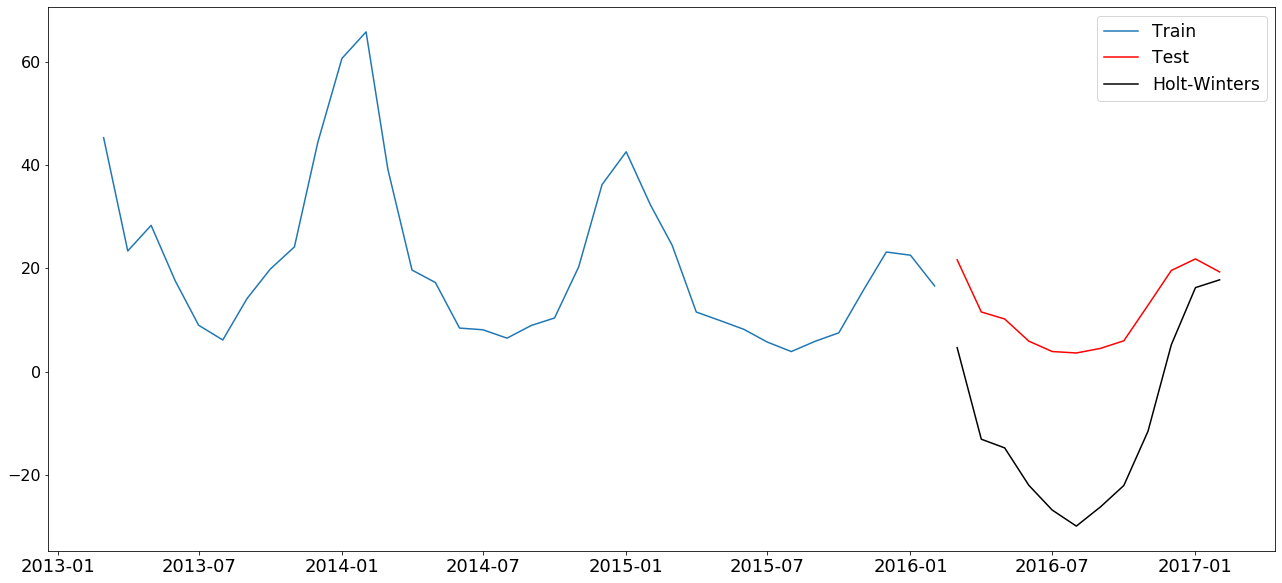

The Mean Squared Error of SO2 forecasts is 577.0584
The Mean Absolute Error of SO2 forecasts is 21.9392
The Root Mean Squared Error of SO2 forecasts is 24.022

Results for SO2 successfully saved to result/holt_winter.csv

Prediction results for  NO2


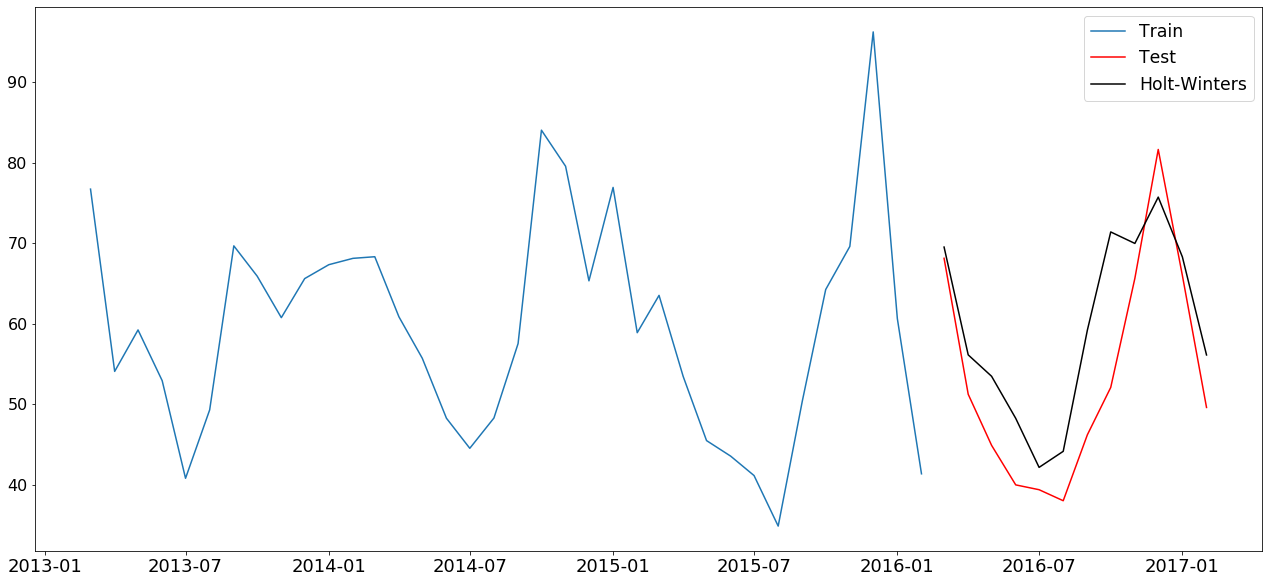

The Mean Squared Error of NO2 forecasts is 71.1976
The Mean Absolute Error of NO2 forecasts is 6.9431
The Root Mean Squared Error of NO2 forecasts is 8.4379

Results for NO2 successfully saved to result/holt_winter.csv

Prediction results for  CO


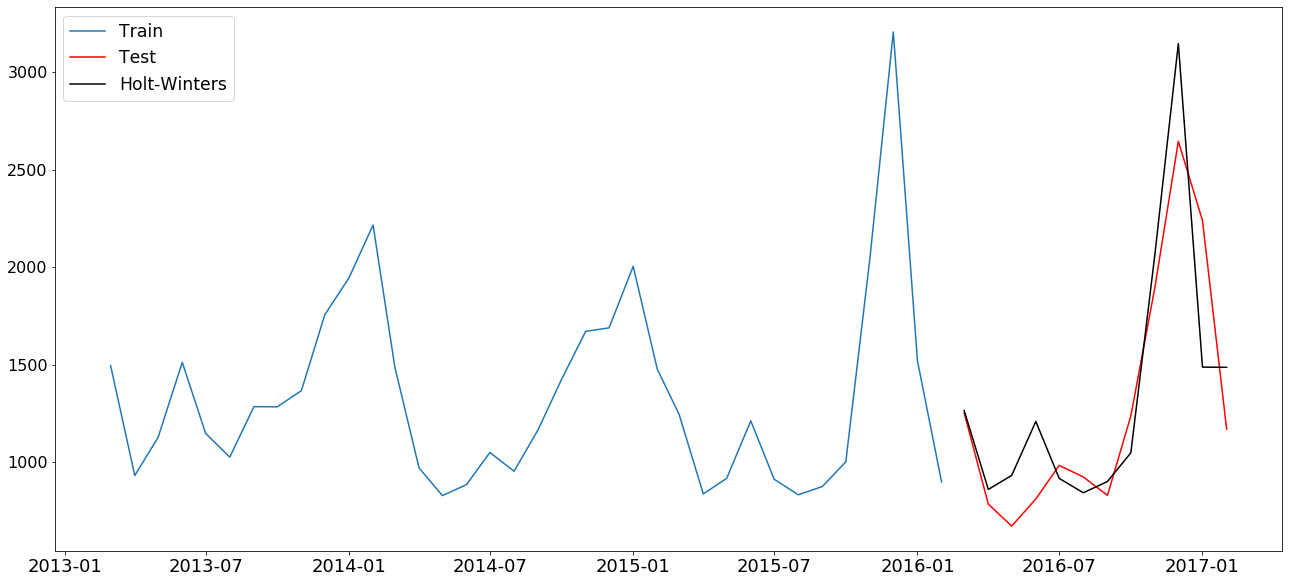

The Mean Squared Error of CO forecasts is 102336.9931
The Mean Absolute Error of CO forecasts is 240.9536
The Root Mean Squared Error of CO forecasts is 319.9015

Results for CO successfully saved to result/holt_winter.csv

Prediction results for  O3


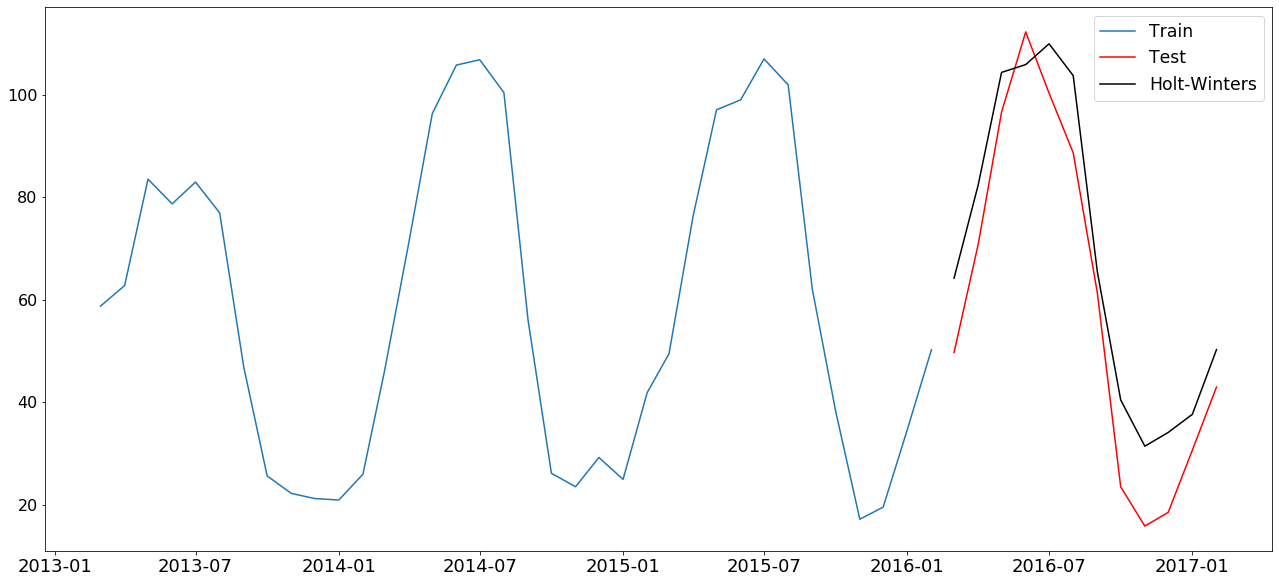

The Mean Squared Error of O3 forecasts is 138.0659
The Mean Absolute Error of O3 forecasts is 10.9535
The Root Mean Squared Error of O3 forecasts is 11.7501

Results for O3 successfully saved to result/holt_winter.csv


In [10]:
# create list of all train-sets
list_train = [train_PM25, train_PM10, train_SO2, train_NO2, train_CO, train_O3]
# create list of all test-sets
list_test = [test_PM25, test_PM10, test_SO2, test_NO2, test_CO, test_O3]
for i in range(len(list_train)):
    print('\nPrediction results for ',list_train[i].columns.values[0])
    # fit each train data to the model       Note: Seasonal periods will be 12 (monthly data)
    model = ExponentialSmoothing(list_train[i], seasonal='add', seasonal_periods=12).fit()
    # predict with the model
    holt_pred = model.predict(start=list_test[i].index[0], end=list_test[i].index[-1])
    # plot the results
    plt.figure(figsize=(22, 10))
    plt.plot(list_train[i].index, list_train[i], label='Train')
    plt.plot(list_test[i].index, list_test[i], label='Test', color='r')
    plt.plot(holt_pred.index, holt_pred, label='Holt-Winters', color='k')
    plt.legend(loc='best', fontsize='xx-large')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=16)
    plt.show()
    
    # model evaluation
    actual = list_test[i]
    pred = holt_pred

    # calcuate mean square error
    mse = round(mean_squared_error(actual, pred), 4)
    # calculate mean absolute error
    mae = round(mean_absolute_error(actual, pred), 4)
    # calculate root mean square error
    rmse = round(np.sqrt(mse), 4)
    # print the results
    print('The Mean Squared Error of {} forecasts is {}'.format(list_train[i].columns.values[0], mse))
    print('The Mean Absolute Error of {} forecasts is {}'.format(list_train[i].columns.values[0], mae))
    print('The Root Mean Squared Error of {} forecasts is {}'.format(list_train[i].columns.values[0], rmse))
    
    # save results locally
    if not os.path.exists('result'): os.mkdir('result')
    if not os.path.exists('result/holt_winter.csv'):
        # create result dataframe for storing evaluation results(initialized with zeros)
        pd.DataFrame(data = {'EM' : ['mse','mae','rmse'] , 'PM2.5': [0.0,0.0,0.0], 'PM10': [0.0,0.0,0.0],
                                  'SO2': [0.0,0.0,0.0], 'NO2': [0.0,0.0,0.0],
                                  'CO': [0.0,0.0,0.0], 'O3': [0.0,0.0,0.0],


                            }).to_csv('result/holt_winter.csv',index = False)
        
    # read the lstm.csv file
    result = pd.read_csv('result/holt_winter.csv', dtype = {'EM':str})
    # set index as EM (Evaluation Matrix)
    result.set_index('EM', inplace = True)
    # write all the results
    result[list_train[i].columns.values[0]]['mse'] = mse
    result[list_train[i].columns.values[0]]['mae'] = mae
    result[list_train[i].columns.values[0]]['rmse'] = rmse
    # save the file after writing
    result.to_csv('result/holt_winter.csv')
    # display successfull write message
    print('\nResults for {} successfully saved to result/holt_winter.csv'.format(actual.columns.values[0]))

Holt-Winter performed quite well for the monthly data as compared to other statistical models.<br>
<br>We will now proceed to <b>Part 5: Time Series with LSTM